In [34]:
from pynini import *

def tabla_de_simbolos():
    alf = list('abcdrisj-.{}') + ['-']
    ts = SymbolTable()
    ts.add_symbol('ε', 0)

    for simbolo in alf:
        ts.add_symbol(simbolo, ord(simbolo))

    return ts







## Entrega 6. Ejercicio FST

 1. El autómata N que inserte puntos decimales en un entero (representado como cadena) para facilitar su lectura, dividiendo los dígitos en grupos de tres de la manera estándar. Por ejemplo, "103" → "103"  y  "-14321060" → "-14.321.060". Para simplificar el autómata, se puede suponer que el símbolo 'd' representa un dígito cualquiera.


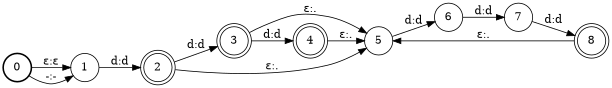

In [35]:
sym = tabla_de_simbolos()
R = Fst()
R.set_input_symbols(sym)
R.set_output_symbols(sym)

sa0 = R.add_state()
sa1 = R.add_state()
sa2 = R.add_state()
sa3 = R.add_state()
sa4 = R.add_state()
sa5 = R.add_state()
sa6 = R.add_state()
sa7 = R.add_state()
sa8 = R.add_state()

R.add_arc(sa0, Arc(0, 0, 0, sa1))
R.add_arc(sa0, Arc(ord('-'), ord('-'), 0, sa1))
R.add_arc(sa1, Arc(ord('d'), ord('d'), 0, sa2))
R.add_arc(sa2, Arc(ord('d'), ord('d'), 0, sa3))
R.add_arc(sa3, Arc(ord('d'), ord('d'), 0, sa4))
R.add_arc(sa2, Arc(0, ord('.'), 0, sa5))
R.add_arc(sa3, Arc(0, ord('.'), 0, sa5))
R.add_arc(sa4, Arc(0, ord('.'), 0, sa5))
R.add_arc(sa5, Arc(ord('d'), ord('d'), 0, sa6))
R.add_arc(sa6, Arc(ord('d'), ord('d'), 0, sa7))
R.add_arc(sa7, Arc(ord('d'), ord('d'), 0, sa8))
R.add_arc(sa8, Arc(0, ord('.'), 0, sa5))


R.set_start(sa0)
R.set_final(sa2)
R.set_final(sa3)
R.set_final(sa4)
R.set_final(sa8)

 2. El autómata R que mapee la cadena de entrada "risa" en su onomatopeya, representada por el conjunto infinito (ja)+. Por ejemplo, "risa" → "ja", "risa" → "jaja", "risa" → "jajaja",...

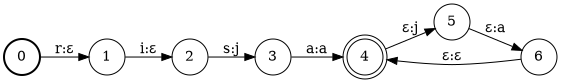

In [36]:
sym = tabla_de_simbolos()

# Aceptor para (a|b)
R = Fst()
sa0 = R.add_state()
sa1 = R.add_state()
sa2 = R.add_state()
sa3 = R.add_state()
sa4 = R.add_state()
sa5 = R.add_state()
sa6 = R.add_state()


R.add_arc(sa0, Arc(ord('r'), 0, 0, sa1))
R.add_arc(sa1, Arc(ord('i'), 0, 0, sa2))
R.add_arc(sa2, Arc(ord('s'), ord('j'), 0, sa3))
R.add_arc(sa3, Arc(ord('a'), ord('a'), 0, sa4))
R.add_arc(sa4, Arc(0, ord('j'), 0, sa5))
R.add_arc(sa5, Arc(0, ord("a"), 0, sa6))
R.add_arc(sa6, Arc(0, 0, 0, sa4))



R.set_start(sa0)
R.set_final(sa4)
R.set_input_symbols(sym)
R.set_output_symbols(sym)


3. El autómata C que permita encierre cada ocurrencia de "ab" entre corchetes,  suponiendo que las cadenas de entrada están formadas por el alfabeto {a,b,c,d}. Por ejemplo, "dcbaaacd" → "dcbaaacd", "caaabbabc" → "caa{ab}b{ab}c".


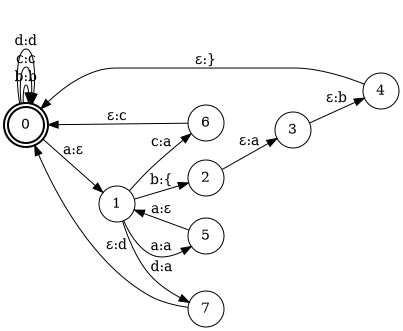

In [37]:
sym = tabla_de_simbolos()

C = Fst()
sa0 = C.add_state()
sa1 = C.add_state()
sa2 = C.add_state()
sa3 = C.add_state()
sa4 = C.add_state()
sa5 = C.add_state()
sa6 = C.add_state()
sa7 = C.add_state()


C.add_arc(sa0, Arc(ord('b'), ord('b'), 0, sa0))
C.add_arc(sa0, Arc(ord('c'), ord('c'), 0, sa0))
C.add_arc(sa0, Arc(ord('d'), ord('d'), 0, sa0))
C.add_arc(sa0, Arc(ord('a'), 0, 0, sa1))
C.add_arc(sa1, Arc(ord('b'), ord('{'), 0, sa2))
C.add_arc(sa2, Arc(0, ord('a'), 0, sa3))
C.add_arc(sa3, Arc(0, ord('b'), 0, sa4))
C.add_arc(sa4, Arc(0, ord('}'), 0, sa0))
C.add_arc(sa1, Arc(ord('a'), ord('a'), 0, sa5))
C.add_arc(sa5, Arc(ord('a'), 0, 0, sa1))
C.add_arc(sa1, Arc(ord('c'), ord('a'), 0, sa6))
C.add_arc(sa6, Arc(0, ord('c'), 0, sa0))
C.add_arc(sa1, Arc(ord('d'), ord('a'), 0, sa7))
C.add_arc(sa7, Arc(0, ord('d'), 0, sa0))


C.set_start(sa0)
C.set_final(sa0)

C.set_input_symbols(sym)
C.set_output_symbols(sym)